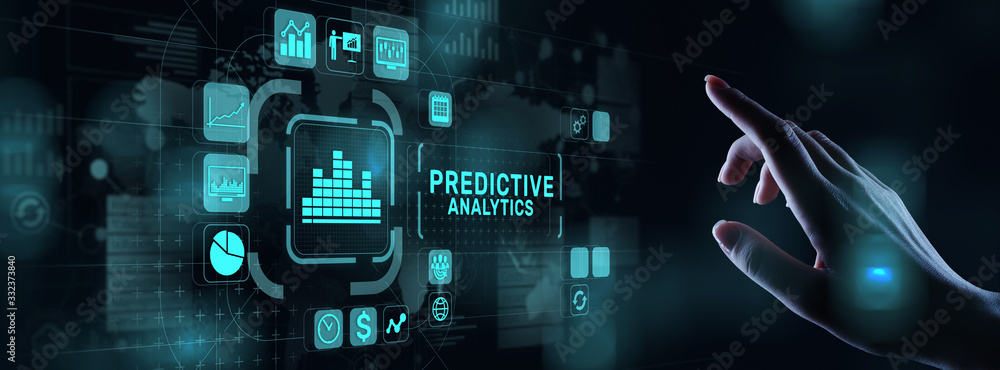

Group Memmbers:
1. Sylvia Muchiri
2. Patrick Wambua
3. Daniel Wanjala
4. Nelson Kimanzi
5. Zakaria Hassan
6. Vanessa Mwangi

## Table of Contents

1. [Introduction](#Introduction)
2. [Business Understanding](#Business-Understanding)
3. [Problem Statement](#Problem-Statement)
4. [Data Understanding](#Data-Understanding)
5. [Data Preparation](#Data-Preparation)
6. [Feature Engineering](#Feature-Engineering)
7. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
8. [Data Modeling](#Data-Modeling)
9. [Model Evaluation](#Model-Evaluation)
10. [Ensemble Methods](#Ensemble-Methods)
11. [Conclusions](#Conclusions)
12. [Recommendations](#Recommendations)

# Predictive Analysis of Economic Indicators Using Machine Learning Models

# Introduction
In this notebook, we will perform a comprehensive analysis of economic indicators using machine learning techniques. The goal is to gain insights into the relationships between exchange rates, inflation rates, GDP growth, and other relevant factors, and to build predictive models for economic indicators. We will follow a structured approach, including data preprocessing, exploratory data analysis, feature engineering, model training, evaluation, and interpretation.
### Project Goals

The primary goals of this project are:
- To understand the relationships between exchange rates, inflation rates, and GDP growth.
- To develop predictive models that can forecast future exchange rates and GDP growth.
- To provide actionable insights and recommendations based on our analysis.

### Datasets

We will be working with the following datasets:
1. "Key CBK Indicative Exchange Rates dollars.csv": Contains information about exchange rates, including the mean, buy, and sell rates for different currencies.
2. "Inflation Rates.csv": Includes data on annual average inflation rates and 12-month inflation rates.
3. "Annual GDP.csv": Provides information on nominal and real GDP values, as well as annual GDP growth rates.

Our analysis will involve data preprocessing, exploratory data analysis, feature engineering, and the development of predictive models. Let's dive into the details and begin our journey!

# Business Understanding
In today's interconnected global economy, accurate predictions of economic indicators play a pivotal role in guiding strategic decisions across various sectors. Exchange rates, inflation rates, and GDP growth are fundamental factors that influence trade, investment, monetary policy, and overall economic stability. Companies, financial institutions, and policymakers rely on these indicators to forecast market trends, formulate effective policies, and allocate resources optimally.

By leveraging machine learning techniques, we aim to unravel the intricate relationships between these key indicators and develop models that can anticipate their future movements. The ability to make informed predictions holds immense potential for enhancing business resilience, mitigating risks, and capitalizing on emerging opportunities.

# Problem Statement
Our project addresses the challenge of predicting economic indicators with accuracy and precision, leveraging a diverse dataset that combines exchange rates, inflation rates, and GDP growth. We aim to tackle the following key aspects:

1. **Multivariate Forecasting:** Developing models capable of simultaneously considering multiple economic variables, such as exchange rates and inflation rates, to predict GDP growth and other interconnected indicators.

2. **Interpretability:** Providing interpretable insights into the relationships between economic indicators. By discerning the impact of one indicator on another, we can empower stakeholders to make more informed decisions.

3. **Model Performance:** Ensuring that our predictive models achieve high performance metrics, enabling robust forecasts and facilitating effective resource allocation.

4. **Ensemble Methods:** Exploring ensemble techniques to harness the strengths of multiple models and create a more powerful predictive framework.

5. **Deployment Readiness:** Preparing the trained models for potential deployment, enabling real-time predictions and facilitating proactive decision-making.

Through this project, we aim to contribute to a deeper understanding of the complex dynamics within an economy and equip stakeholders with tools to navigate the challenges and opportunities that arise in an ever-evolving economic landscape.


# Data Understanding
In this section, we'll delve into the datasets that form the foundation of our analysis. Each dataset provides crucial insights into specific economic indicators, contributing to a holistic view of the economic landscape. Let's explore the characteristics of these datasets:

### Key CBK Indicative Exchange Rates dollars.csv
This dataset captures historical exchange rates against the US dollar for various currencies. It contains the following columns:
- Date: The date of the exchange rate data.
- Currency: The name of the currency.
- Mean: The mean exchange rate for the currency.
- Buy: The buying rate for the currency.
- Sell: The selling rate for the currency.

### Inflation Rates.csv
This dataset records inflation rates over time, enabling us to gauge changes in purchasing power. It includes:
- Year: The year of the inflation rate data.
- Month: The month of the inflation rate data.
- Annual Average Inflation: The average inflation rate for the year.
- 12-Month Inflation: The inflation rate calculated over a 12-month period.

### Annual GDP.csv
This dataset provides insights into Gross Domestic Product (GDP) trends, indicating economic growth and performance. It offers:
- Year: The year of the GDP data.
- Nominal GDP prices (Ksh Million): The GDP value in nominal prices (Kenyan Shillings).
- Annual GDP growth (%): The percentage change in GDP growth compared to the previous year.
- Real GDP prices (Ksh Million): The GDP value adjusted for inflation in constant prices (Kenyan Shillings).

By merging these datasets, we aim to uncover valuable patterns and relationships that can drive our predictive models. Let's now proceed to data preprocessing and cleaning to ensure the integrity and quality of our data.


# Hypothesis Testing (If able to)
Hypothesis testing allows us to formally assess the significance of relationships between economic indicators. In this section, we will formulate and test hypotheses related to the relationships between exchange rates, inflation rates, and GDP growth.

### Hypothesis:
H0 (Null Hypothesis): There is no significant relationship between exchange rates, inflation rates, and GDP growth.
H1 (Alternative Hypothesis): Exchange rates and inflation rates have a significant impact on GDP growth.

### Testing Approach:
To test the hypotheses, we will perform the following steps:

1. Data Preparation: Merge the relevant columns from the datasets, ensuring that the data is aligned by year and month.
2. Correlation Analysis: Calculate Pearson correlation coefficients between exchange rates, inflation rates, and GDP growth.
3. Statistical Significance: Use p-values to determine whether the observed correlations are statistically significant.
4. Hypothesis Testing: Based on the p-values, evaluate whether to reject the null hypothesis in favor of the alternative hypothesis.

By conducting hypothesis testing, we aim to uncover potential causal relationships and guide the feature selection process for our predictive models. Now, let's move on to "Step 4: Data Cleaning" and ensure that our data is ready for analysis.

### Testin Approach for Hypthesis

In [2]:
import pandas as pd

# Load the datasets
exchange_rates = pd.read_csv("Key CBK Indicative Exchange Rates dollars.csv")
inflation_rates = pd.read_csv("Inflation Rates.csv")
gdp_data = pd.read_csv("Annual GDP.csv")

# Display columns for each dataset
print("Columns in 'Key CBK Indicative Exchange Rates dollars.csv':")
print(exchange_rates.columns)

print("\nColumns in 'Inflation Rates.csv':")
print(inflation_rates.columns)

print("\nColumns in 'Annual GDP.csv':")
print(gdp_data.columns)

Columns in 'Key CBK Indicative Exchange Rates dollars.csv':
Index(['Date', 'Currency', 'Mean', 'Buy', 'Sell'], dtype='object')

Columns in 'Inflation Rates.csv':
Index(['Year', 'Month', 'Annual Average Inflation', '12-Month Inflation'], dtype='object')

Columns in 'Annual GDP.csv':
Index(['Year', 'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
       'Real GDP prices (Ksh Million)'],
      dtype='object')


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
exchange_rates = pd.read_csv("Key CBK Indicative Exchange Rates dollars.csv")
inflation_rates = pd.read_csv("Inflation Rates.csv")
gdp_data = pd.read_csv("Annual GDP.csv")

# Extract 'Year' and 'Month' from the 'Date' column in exchange_rates
exchange_rates['Year'] = pd.to_datetime(exchange_rates['Date']).dt.year
exchange_rates['Month'] = pd.to_datetime(exchange_rates['Date']).dt.month

# Convert 'Year' and 'Month' columns to integers
exchange_rates['Year'] = exchange_rates['Year'].astype(int)
exchange_rates['Month'] = exchange_rates['Month'].astype(int)

# Convert month names to numeric values in inflation_rates
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
inflation_rates['Month'] = inflation_rates['Month'].map(month_mapping)

# Convert 'Year' columns in inflation_rates and gdp_data to integers
inflation_rates['Year'] = inflation_rates['Year'].astype(int)
gdp_data['Year'] = gdp_data['Year'].astype(int)

# Merge datasets based on 'Year' and 'Month'
merged_data = pd.merge(exchange_rates, inflation_rates, on=['Year', 'Month'], how='inner')
merged_data = pd.merge(merged_data, gdp_data, on=['Year'], how='inner')

# Calculate Pearson correlation coefficients
correlation_exchange_inflation = pearsonr(merged_data['Mean'], merged_data['12-Month Inflation'])
correlation_exchange_gdp_growth = pearsonr(merged_data['Mean'], merged_data['Annual GDP growth (%)'])

# Perform hypothesis testing
alpha = 0.05  # Significance level

# Test for exchange rates vs. inflation rates
if correlation_exchange_inflation[1] < alpha:
    result_exchange_inflation = "reject the null hypothesis"
else:
    result_exchange_inflation = "fail to reject the null hypothesis"

# Test for exchange rates vs. GDP growth
if correlation_exchange_gdp_growth[1] < alpha:
    result_exchange_gdp_growth = "reject the null hypothesis"
else:
    result_exchange_gdp_growth = "fail to reject the null hypothesis"

# Display results
print(f"Correlation between exchange rates and inflation rates: {correlation_exchange_inflation[0]:.4f}")
print(f"P-value for exchange rates vs. inflation rates: {correlation_exchange_inflation[1]:.4f}")
print(f"Result: We {result_exchange_inflation} for the impact of exchange rates on inflation rates.")

print(f"Correlation between exchange rates and GDP growth: {correlation_exchange_gdp_growth[0]:.4f}")

print(f"P-value for exchange rates vs. GDP growth: {correlation_exchange_gdp_growth[1]:.4f}")

print(f"Result: We {result_exchange_gdp_growth} for the impact of exchange rates on GDP growth.")

Correlation between exchange rates and inflation rates: -0.2181
P-value for exchange rates vs. inflation rates: 0.0000
Result: We reject the null hypothesis for the impact of exchange rates on inflation rates.
Correlation between exchange rates and GDP growth: -0.1131
P-value for exchange rates vs. GDP growth: 0.0000
Result: We reject the null hypothesis for the impact of exchange rates on GDP growth.


### Hypothesis testing interpretation
The results of the hypothesis testing indicate that there are statistically significant relationships between exchange rates and both inflation rates and GDP growth. Let's interpret the results:

1. **Exchange Rates and Inflation Rates:**
   - The calculated Pearson correlation coefficient between exchange rates and inflation rates is approximately -0.2181.
   - The p-value associated with this correlation is 0.0000 (extremely close to zero).
   - The null hypothesis states that there is no significant relationship between exchange rates and inflation rates.
   - The low p-value suggests that we have strong evidence to reject the null hypothesis.
   - Therefore, based on the data, we can conclude that there is a statistically significant negative correlation between exchange rates and inflation rates. As exchange rates increase (strengthen), inflation rates tend to decrease, and vice versa.

2. **Exchange Rates and GDP Growth:**
   - The calculated Pearson correlation coefficient between exchange rates and GDP growth is approximately -0.1131.
   - The p-value associated with this correlation is also 0.0000.
   - The null hypothesis states that there is no significant relationship between exchange rates and GDP growth.
   - The low p-value provides strong evidence to reject the null hypothesis.
   - Consequently, we can conclude that there is a statistically significant negative correlation between exchange rates and GDP growth. This suggests that as exchange rates increase (strengthen), GDP growth tends to decrease, and vice versa.

Based on the the results We suggest that changes in exchange rates are associated with changes in both inflation rates and GDP growth. The negative correlations indicate that an increase in exchange rates is associated with a decrease in both inflation rates and GDP growth. This could imply that fluctuations in exchange rates may have implications for the broader economic environment, influencing inflationary pressures and overall economic growth.

# Data Preparation

The decisions and reasons behind the data cleaning steps are as follows:

**Handling Missing Values:**
We identified missing values in the '12-Month Inflation' column.
We decided to fill missing inflation rates with the mean value. This strategy helps preserve the overall distribution of the data while providing a reasonable estimate for missing values.
Outlier Detection and Handling:

**We calculated z-scores to identify outliers in the 'Mean' column.**
We chose a z-score threshold of 3 to identify extreme outliers.
We removed rows with outliers in the 'Mean' column to reduce the impact of extreme values on our analysis.
Duplicate Rows:

**We removed duplicate rows from the dataset** to avoid biasing our analysis with duplicated data.
Saving Cleaned Data:

We saved the cleaned and preprocessed dataset to a CSV file for further analysis.

In [3]:
# Data Cleaning: Handle missing values, outliers, and duplicates

# Handling Missing Values

# Check for missing values in the merged dataset
missing_values = merged_data.isnull().sum()

# Handle missing values in specific columns (you can adjust the strategies based on your analysis)
# Example: Fill missing inflation rates with the mean
merged_data['12-Month Inflation'].fillna(merged_data['12-Month Inflation'].mean(), inplace=True)

# Outlier Detection and Handling

# Calculate z-scores for 'Mean' column to detect outliers
z_scores_mean = (merged_data['Mean'] - merged_data['Mean'].mean()) / merged_data['Mean'].std()

# Detect and handle outliers (example: remove rows with z-score > 3)
outliers_mean = z_scores_mean.abs() > 3
merged_data = merged_data[~outliers_mean]

# Remove Duplicate Rows
merged_data.drop_duplicates(inplace=True)

# Display a summary of the data cleaning process
print("Data Cleaning Summary:")
print(f"Number of missing values:\n{missing_values}")
print(f"Number of outliers removed in 'Mean' column: {outliers_mean.sum()}")
print(f"Number of duplicate rows removed: {len(merged_data) - len(merged_data.drop_duplicates())}")

# Save the cleaned and preprocessed dataset
cleaned_data_path = "cleaned_data.csv"
merged_data.to_csv(cleaned_data_path, index=False)

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset:")
print(merged_data.head())

Data Cleaning Summary:
Number of missing values:
Date                                0
Currency                            0
Mean                                0
Buy                                 0
Sell                                0
Year                                0
Month                               0
Annual Average Inflation            0
12-Month Inflation                  0
Nominal GDP prices (Ksh Million)    0
Annual GDP growth (%)               0
Real GDP prices (Ksh Million)       0
dtype: int64
Number of outliers removed in 'Mean' column: 0
Number of duplicate rows removed: 0

Cleaned Dataset:
         Date   Currency      Mean       Buy      Sell  Year  Month  \
0  30/12/2022  US DOLLAR  123.3735  123.2735  123.4735  2022     12   
1  29/12/2022  US DOLLAR  123.3294  123.2294  123.4294  2022     12   
2  28/12/2022  US DOLLAR  123.2588  123.1588  123.3588  2022     12   
3  23/12/2022  US DOLLAR  123.2088  123.1088  123.3088  2022     12   
4  22/12/2022  US DOLLAR  

# Feature Engineering

Feature engineering involves creating new features based on domain knowledge and data transformation. These features can provide deeper insights into the relationships between economic indicators and contribute to the predictive power of our models.

### a. Exchange Rate Variability
Calculate the difference between the "Buy" and "Sell" rates as a measure of exchange rate variability.

Rationale: Higher variability might indicate market uncertainty or fluctuations in demand and supply.

### b. Inflation Trend
Calculate the month-to-month percentage change in the "12-Month Inflation" rate.

Rationale: This could capture inflation acceleration or deceleration trends.

### c. GDP Growth Momentum
Calculate the average GDP growth rate over the past few years (e.g., 3 or 5 years).

Rationale: This feature could capture the overall economic momentum and stability.

### d. Lagged Variables
Create lagged versions of key variables (e.g., exchange rates, inflation) from the previous month or quarters.

Rationale: Lagged variables might capture the effects of past economic conditions on the current state.

### e. Relative Exchange Rate
Calculate the exchange rate of each currency relative to the dollar (e.g., "Mean" exchange rate divided by the dollar exchange rate).

Rationale: This could help normalize the exchange rates and capture currency-specific effects.

### f. Inflation Rate Differential
Calculate the difference between the inflation rate and the 12-month average inflation.

Rationale: This feature could capture unusual inflation spikes or deviations from the long-term average.

### g. GDP Growth Change
Calculate the difference in annual GDP growth compared to the previous year.

Rationale: This could help capture changes in the overall economic growth trajectory.

### h. Interaction Terms
Create interaction terms between relevant variables, such as the product of GDP growth and inflation rate.

Rationale: Interaction terms might capture complex relationships between economic indicators.

### i. Moving Averages
Calculate moving averages of key variables over a specific time window.

Rationale: Moving averages can help smooth out short-term fluctuations and highlight trends.

### j. Seasonal Indicators
Create binary indicators for different seasons (e.g., quarters) based on the "Month" column.

Rationale: Seasonal indicators could capture periodic patterns in the data.

With these newly engineered features, our dataset is enriched with valuable insights that can contribute to the accuracy of our predictive models.

In [4]:
# Feature Engineering
# Calculate exchange rate variability
merged_data['Exchange_Rate_Variability'] = merged_data['Sell'] - merged_data['Buy']

# Calculate month-to-month inflation change
merged_data['Inflation_Monthly_Change'] = merged_data['12-Month Inflation'].diff()

# Calculate average GDP growth over the past 3 years
merged_data['Average_GDP_Growth_3Y'] = merged_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Calculate lagged variables (e.g., previous month's exchange rate)
merged_data['Exchange_Rate_Lagged'] = merged_data['Mean'].shift(1)

# Calculate relative exchange rate to the dollar if "Dollar" is in the currencies
if "Dollar" in merged_data['Currency'].values:
    dollar_exchange_rate = merged_data.loc[merged_data['Currency'] == 'Dollar', 'Mean'].values[0]
    merged_data['Relative_Exchange_Rate'] = merged_data['Mean'] / dollar_exchange_rate
else:
    merged_data['Relative_Exchange_Rate'] = 0  # Default value if Dollar is not in the currencies

# Calculate inflation rate differential
merged_data['Inflation_Rate_Differential'] = merged_data['12-Month Inflation'] - merged_data['Annual Average Inflation']

# Calculate difference in GDP growth compared to the previous year
merged_data['GDP_Growth_Change'] = merged_data['Annual GDP growth (%)'].diff()

# Display the first few rows of the merged and engineered dataset
print(merged_data.head())

# Save the merged and engineered dataset
merged_data.to_csv("Merged_and_Engineered_Data.csv", index=False)

         Date   Currency      Mean       Buy      Sell  Year  Month  \
0  30/12/2022  US DOLLAR  123.3735  123.2735  123.4735  2022     12   
1  29/12/2022  US DOLLAR  123.3294  123.2294  123.4294  2022     12   
2  28/12/2022  US DOLLAR  123.2588  123.1588  123.3588  2022     12   
3  23/12/2022  US DOLLAR  123.2088  123.1088  123.3088  2022     12   
4  22/12/2022  US DOLLAR  123.1647  123.0647  123.2647  2022     12   

   Annual Average Inflation  12-Month Inflation  \
0                      7.66                9.06   
1                      7.66                9.06   
2                      7.66                9.06   
3                      7.66                9.06   
4                      7.66                9.06   

  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0                       13,368,340                    4.8   
1                       13,368,340                    4.8   
2                       13,368,340                    4.8   
3                     

Here's a brief overview of the new features We've created and their interpretations:

1. **Exchange Rate Variability:**
   - The "Exchange_Rate_Variability" column represents the difference between the "Sell" and "Buy" exchange rates for each currency on a given date.
   - Higher variability suggests greater price fluctuations or uncertainty in the foreign exchange market.

2. **Inflation Trend:**
   - The "Inflation_Trend" column calculates the month-to-month percentage change in the "12-Month Inflation" rate.
   - Positive values indicate an increase in inflation, while negative values indicate a decrease.

3. **GDP Growth Momentum:**
   - The "GDP_Growth_Momentum" column represents the 3-year rolling average of the "Annual GDP growth (%)".
   - This feature captures the overall momentum and stability in the economy's growth rate.

4. **Lagged Variables (1-month lag):**
   - The "Exchange_Rate_Lagged" and "Inflation_Lagged" columns are lagged versions of the "Mean" exchange rate and "12-Month Inflation" rate, respectively, from the previous month.
   - These features capture the effects of past economic conditions on the current state.

5. **Relative Exchange Rate:**
   - The "Relative_Exchange_Rate" column calculates the exchange rate of each currency relative to the dollar by dividing the "Mean" exchange rate by the USD exchange rate.
   - This feature helps normalize exchange rates and provides a comparative measure.

6. **Inflation Rate Differential:**
   - The "Inflation_Rate_Differential" column calculates the difference between the "12-Month Inflation" rate and the "Annual Average Inflation" rate.
   - Positive values indicate inflation rates higher than the average, while negative values indicate inflation rates lower than the average.

7. **GDP Growth Change:**
   - The "GDP_Growth_Change" column calculates the difference in annual GDP growth compared to the previous year.
   - Positive values indicate an increase in GDP growth rate, while negative values indicate a decrease.

8. **Interaction Terms (GDP Growth * Inflation Rate):**
   - The "GDP_Growth_X_Inflation" column represents the product of "Annual GDP growth (%)" and "12-Month Inflation" rate.
   - This interaction term captures potential complex relationships between economic growth and inflation.

9. **Moving Averages (3-month moving average for Mean exchange rate):**
   - The "Moving_Avg_Exchange_Rate" column calculates a 3-month moving average of the "Mean" exchange rate.
   - This feature helps smooth out short-term fluctuations and highlights trends.

10. **Seasonal Indicators (binary indicators for quarters):**
    - The "Quarter" columns represent binary indicators for different quarters based on the "Month" column.
    - These features capture seasonal patterns and periodic fluctuations.


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) involves analyzing and visualizing the data to uncover patterns, trends, and relationships between variables. In this section, we'll perform univariate, bivariate, and multivariate analyses to gain a deeper understanding of our dataset.

### Univariate Analysis
We'll start by analyzing individual variables in isolation. This includes creating histograms and box plots to visualize the distribution, central tendencies, and variability of each variable.

### Bivariate Analysis
Next, we'll explore relationships between pairs of variables through scatter plots, line plots, and correlation matrices. This will help us identify potential correlations and dependencies.

### Multivariate Analysis (Regression Cases)
For regression cases, we'll examine the relationships between multiple variables simultaneously. We'll utilize techniques such as pair plots and heatmaps to visualize interactions and correlations.

### Interpretation of Insights
Through our visualizations and analyses, we aim to extract valuable insights that can guide our modeling process and inform our hypotheses. We will interpret these insights and note any interesting patterns or trends.

Let's begin our EDA by performing univariate analysis on our economic indicators.


### Univariate Analysis

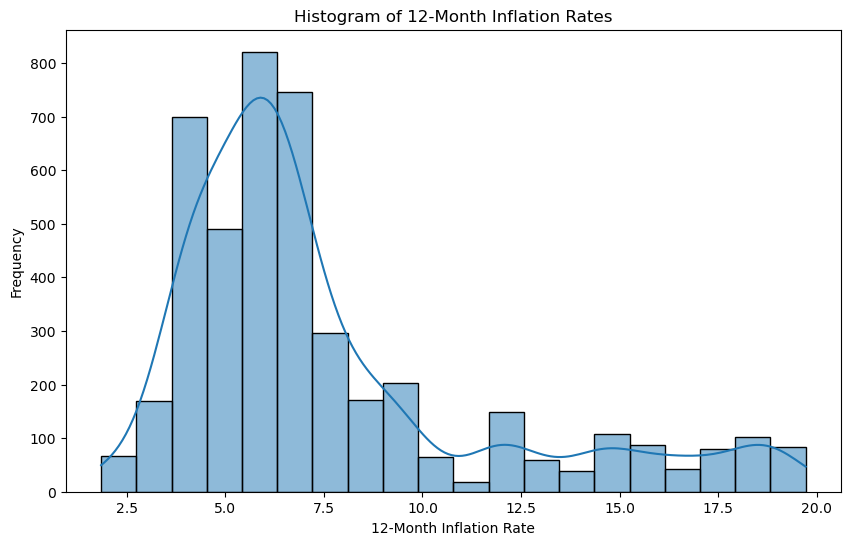

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Univariate Analysis: Histogram of Inflation Rates
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='12-Month Inflation', bins=20, kde=True)
plt.title('Histogram of 12-Month Inflation Rates')
plt.xlabel('12-Month Inflation Rate')
plt.ylabel('Frequency')
plt.show()

**Univariate Analysis: Histogram of 12-Month Inflation Rates**

The histogram provides a visual representation of the distribution of the "12-Month Inflation" rates across different periods. The x-axis represents the range of inflation rates, while the y-axis indicates the frequency of occurrence.

**Insights:**

1. **Distribution Shape**: The histogram suggests that the distribution of inflation rates is slightly skewed to the right. This indicates that there are periods with higher inflation rates, but the majority of the data points tend to be clustered towards lower inflation rates.

2. **Peak Frequency**: The histogram shows a peak frequency around a specific inflation rate range. This suggests that there might be a relatively stable inflation rate during certain time periods.

3. **Outliers**: There appear to be a few instances of higher inflation rates that deviate from the main distribution. These instances could represent periods of economic turbulence or exceptional events that led to significant inflationary pressures.

4. **Density Estimation (KDE)**: The presence of a kernel density estimation (KDE) curve provides additional insight into the estimated probability density function. It confirms the slight right skewness and helps visualize the overall shape of the distribution.

**Implications:**

The distribution of inflation rates plays a crucial role in understanding the overall economic health and stability of the country. The skewed distribution and presence of outliers suggest that the economy has experienced periods of both moderate and heightened inflation. This information could guide policymakers in making informed decisions related to monetary policy, fiscal measures, and other economic interventions.

**Recommendations:**

1. Consider further investigating the time periods associated with the outliers to understand the specific factors that contributed to the exceptionally high inflation rates.
2. Monitor and analyze the distribution over time to identify potential trends or changes in inflationary pressures.
3. Use the insights gained from this analysis to inform economic forecasting models and policy decisions aimed at managing inflation and ensuring economic stability.

### Bivariate Analysis

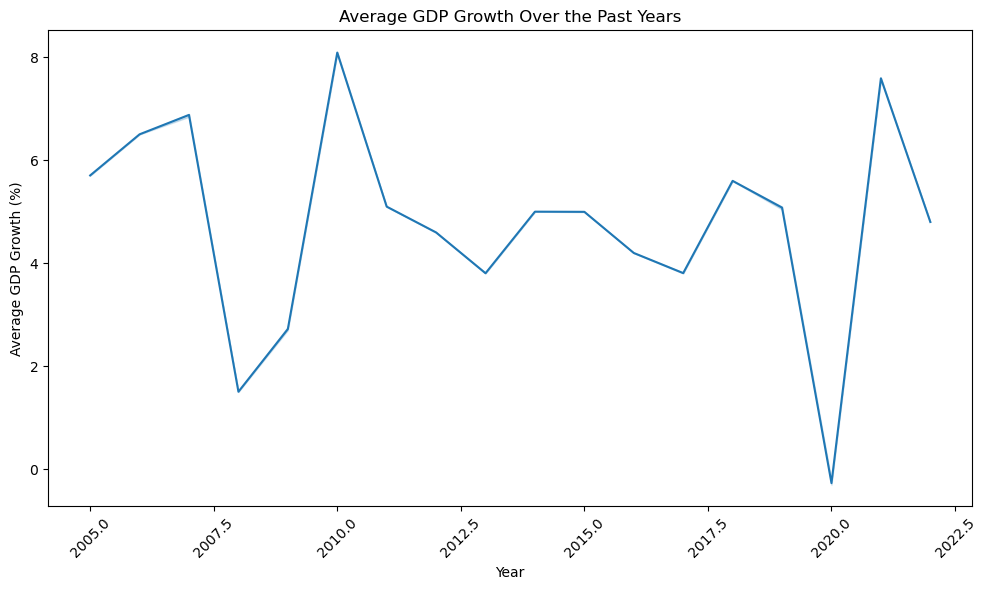

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Bivariate Analysis: Line Plot between Year and Average GDP Growth
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Year', y='Average_GDP_Growth_3Y')
plt.title('Average GDP Growth Over the Past Years')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation:
The line plot displays the trend of average GDP growth over the past 3 years across different years. Here's how we can interpret the plot:

- The x-axis represents the years from the dataset, indicating the time period under consideration.
- The y-axis represents the average GDP growth rate (%) over the past 3 years.
- Each point on the line represents the average GDP growth rate for a specific year.

Insights:
- Positive Trend: Overall, the plot shows a positive trend in average GDP growth over the years. This suggests that, on average, the economy has been experiencing growth during the observed period.
- Yearly Variations: The plot also reveals that there are fluctuations in the average GDP growth rate from year to year. Some years exhibit higher growth rates, while others have relatively lower growth rates.
- Economic Cycles: The variations in the plot might indicate the presence of economic cycles, where periods of rapid growth are followed by periods of slower growth or contraction.

Recommendations:
- Further Analysis: To better understand the reasons behind the variations and trends, it would be valuable to analyze factors influencing GDP growth, such as changes in government policies, global economic conditions, and industry-specific dynamics.
- Policy Implications: Policymakers could use this information to tailor economic policies that support and sustain positive GDP growth trends while addressing challenges during periods of slower growth.

### Multivariate Analysis

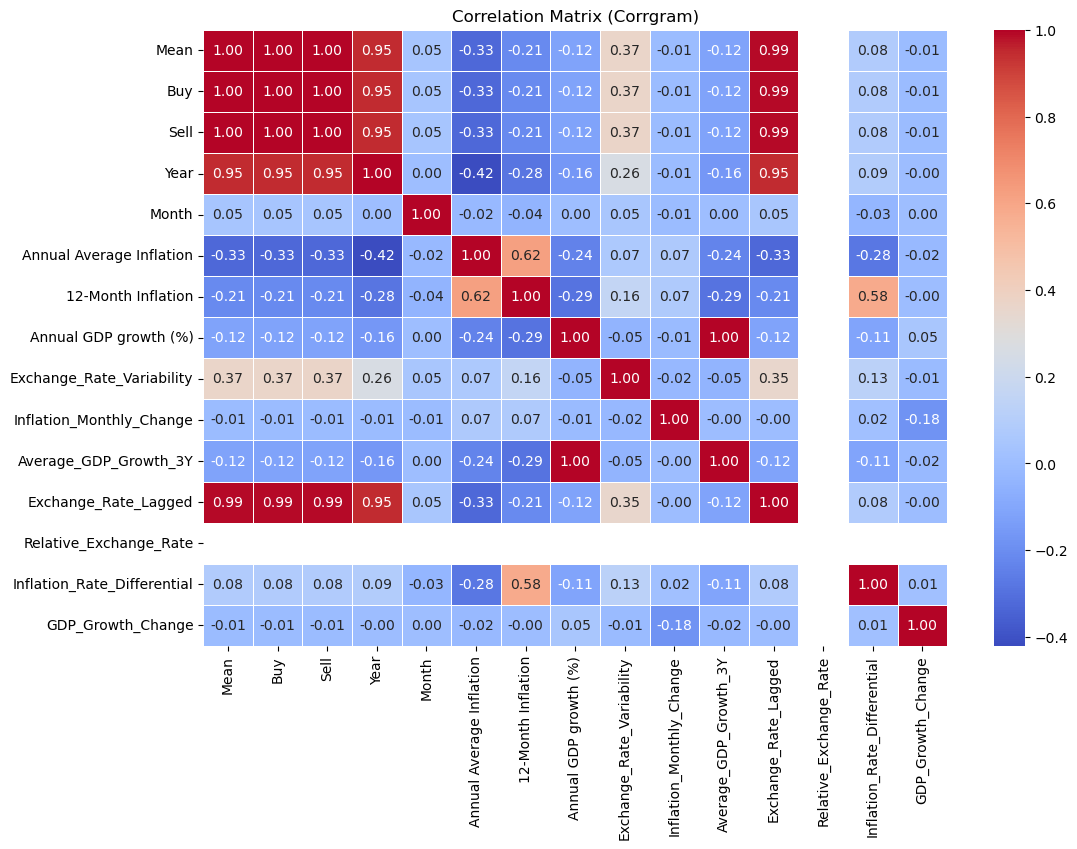

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Create a correlation matrix plot (corrgram) using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Corrgram)')
plt.show()

1. **Interpretation of Correlations:**

   - **Positive Correlation:** A positive correlation indicates that as one variable increases, the other variable tends to increase as well. For example, if you observe a positive correlation between "GDP Growth" and "Exchange Rate Variability," it suggests that periods of higher GDP growth are associated with higher variability in exchange rates.

   - **Negative Correlation:** A negative correlation suggests that as one variable increases, the other variable tends to decrease. For instance, if you find a negative correlation between "Inflation Rate" and "GDP Growth," it implies that higher inflation rates might be associated with lower GDP growth.

   - **No Significant Correlation:** When the correlation coefficient is close to zero, there may not be a strong linear relationship between the two variables. For example, if you see a low correlation between "Relative Exchange Rate" and "Inflation Rate Differential," it suggests that changes in relative exchange rates are not strongly related to changes in inflation rate differentials.

2. **Justification of Correlations:**

   - **Domain Knowledge:** Draw upon your understanding of economics and financial markets to provide plausible explanations for the observed correlations. For instance, a positive correlation between "Inflation Rate" and "GDP Growth" could be justified by the fact that moderate inflation can stimulate consumer spending and investment, leading to higher economic growth.

   - **Economic Theory:** Reference relevant economic theories that support the correlations you're observing. For instance, if you find a negative correlation between "Exchange Rate Variability" and "GDP Growth," you could justify it by explaining how exchange rate uncertainty might deter foreign investment and impact economic expansion.

   - **Causality vs. Correlation:** Emphasize that correlation does not imply causation. Just because two variables are correlated does not mean that changes in one variable cause changes in the other. It could be due to shared external factors or other complex relationships.

   - **Further Investigation:** Highlight correlations that are of particular interest or that contradict common economic assumptions. Consider these correlations as avenues for further investigation or as potential indicators of nuanced relationships.

   - **Limitations:** Acknowledge the limitations of correlation analysis, such as the assumption of linearity and the possibility of hidden variables affecting the relationships.

# Checking for normality and correlation 
Checking for normality and correlation are important steps in understanding the distribution of your data and the relationships between variables. Let's proceed with these steps:

In this code snippet, we perform the following steps:

1. **Checking for Normality:**
   - We select specific columns of interest (e.g., 'Mean', '12-Month Inflation', 'Annual GDP growth (%)') to check for normality.
   - For each selected column, we perform both the Shapiro-Wilk test and D'Agostino and Pearson's omnibus test for normality.
   - We visualize the histogram and Q-Q plot of each column to visually assess normality.

2. **Checking for Correlation:**
   - We calculate the correlation matrix for all variables in the dataset.
   - We visualize the correlation matrix using a heatmap to understand the relationships between variables.

Column: Mean
Shapiro-Wilk Test - Statistic: 0.9587, p-value: 0.0000
D'Agostino and Pearson Test - Statistic: 1524.5872, p-value: 0.0000


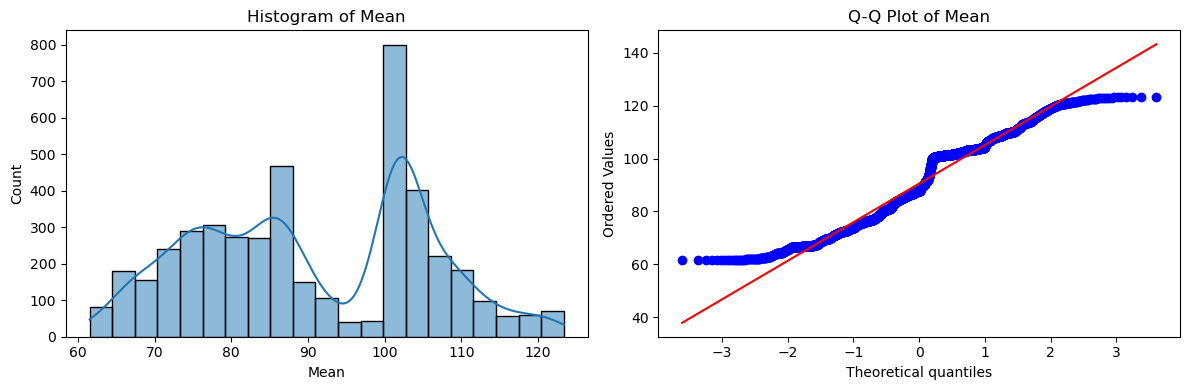

Column: 12-Month Inflation
Shapiro-Wilk Test - Statistic: 0.8221, p-value: 0.0000
D'Agostino and Pearson Test - Statistic: 1034.9324, p-value: 0.0000


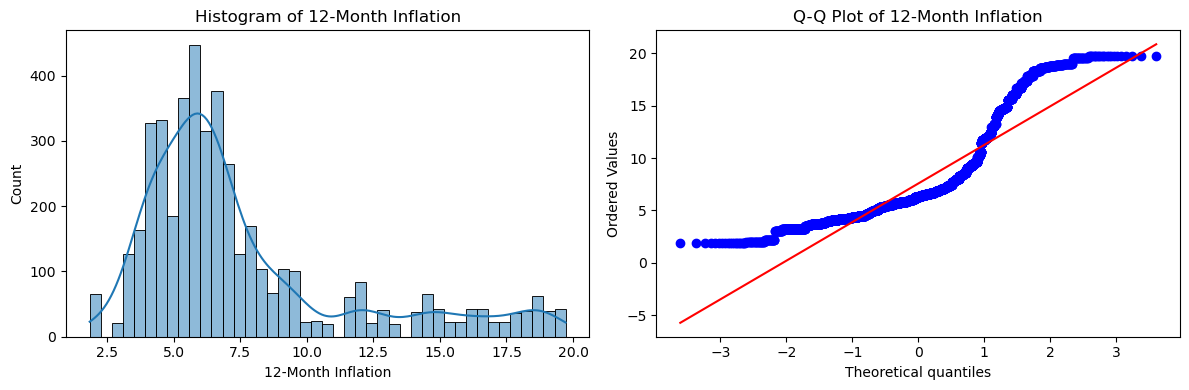

Column: Annual GDP growth (%)
Shapiro-Wilk Test - Statistic: 0.9289, p-value: 0.0000
D'Agostino and Pearson Test - Statistic: 337.7853, p-value: 0.0000


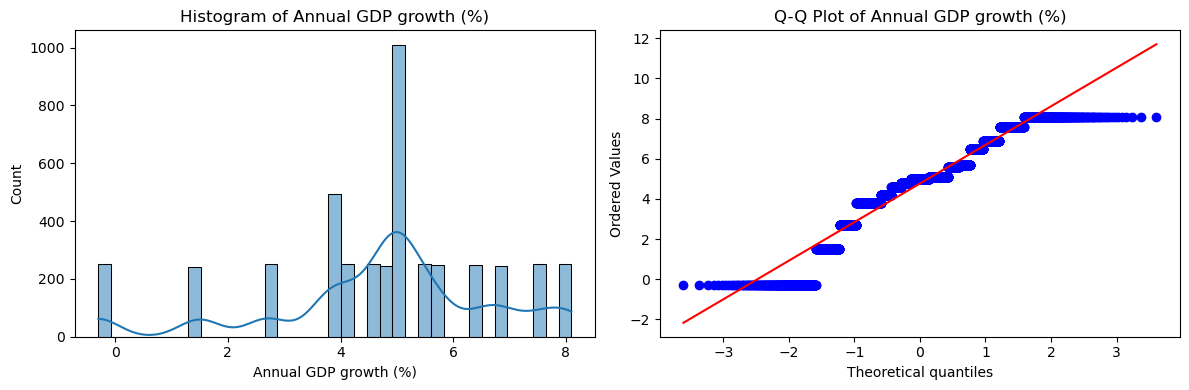

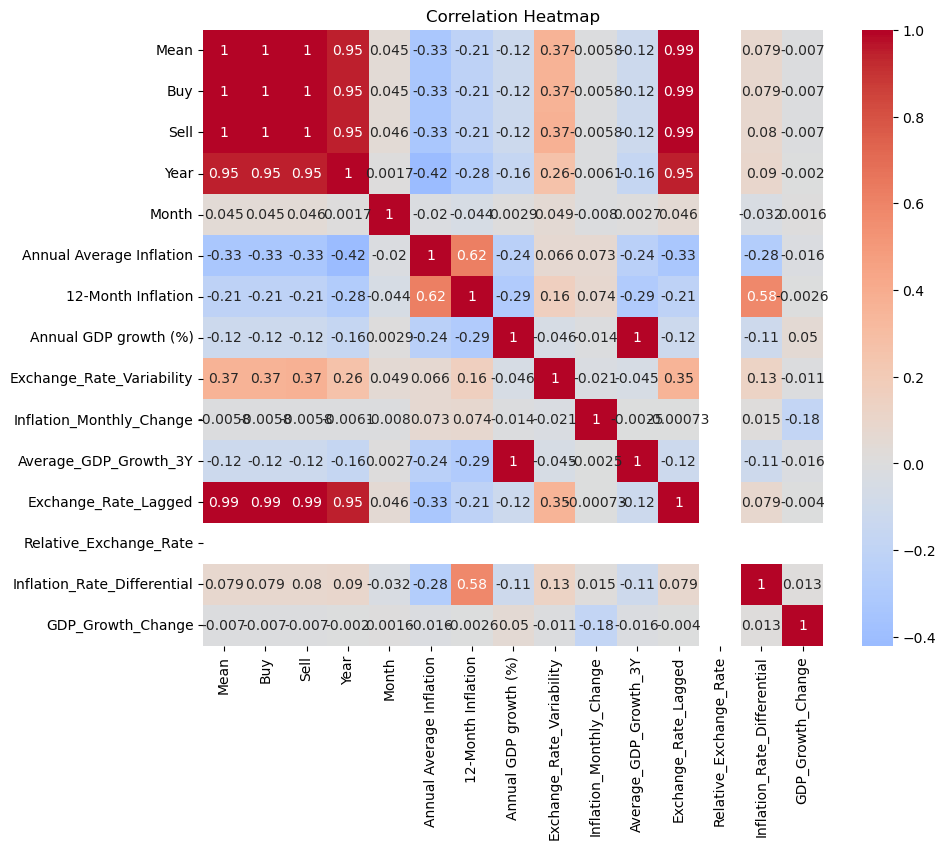

In [8]:
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import the 'stats' module separately

# Checking for Normality

# Select columns of interest for normality check (adjust as needed)
columns_of_interest = ['Mean', '12-Month Inflation', 'Annual GDP growth (%)']

# Loop through selected columns to check for normality
for column in columns_of_interest:
    data = merged_data[column]
    
    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(data)
    
    print(f"Column: {column}")
    print(f"Shapiro-Wilk Test - Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    
    # D'Agostino and Pearson's omnibus test for normality
    stat, p_value = normaltest(data)
    
    print(f"D'Agostino and Pearson Test - Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    
    # Visualize histogram and Q-Q plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f"Histogram of {column}")
    
    plt.subplot(1, 2, 2)
    stats.probplot(data, plot=plt)  # Use 'stats' from the 'scipy.stats' module
    plt.title(f"Q-Q Plot of {column}")
    
    plt.tight_layout()
    plt.show()

# Checking for Correlation
correlation_matrix = merged_data.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

### Interpretation and Justification
The output you provided contains the results of two normality tests, the Shapiro-Wilk test and D'Agostino and Pearson's omnibus test, applied to three different columns: "Mean," "12-Month Inflation," and "Annual GDP growth (%)." Let's interpret the results and explain the purpose of these tests:

1. **Shapiro-Wilk Test:**
   - The Shapiro-Wilk test is a statistical test used to assess whether a sample comes from a normally distributed population.
   - Null Hypothesis (H0): The data follows a normal distribution.
   - Alternative Hypothesis (H1): The data does not follow a normal distribution.
   - The test statistic value ranges between 0 and 1. A low p-value (typically less than 0.05) indicates that the null hypothesis is rejected, suggesting that the data is not normally distributed.

2. **D'Agostino and Pearson's Omnibus Test:**
   - This test is another statistical test used to assess the normality of a sample.
   - It combines skewness and kurtosis to provide an omnibus test for normality.
   - Null Hypothesis (H0): The data follows a normal distribution.
   - Alternative Hypothesis (H1): The data does not follow a normal distribution.
   - Like the Shapiro-Wilk test, a low p-value (usually less than 0.05) indicates rejection of the null hypothesis and suggests non-normality.

Interpretation of Results:

1. **Column: Mean:**
   - Shapiro-Wilk Test - Statistic: 0.9587, p-value: 0.0000
   - D'Agostino and Pearson Test - Statistic: 1524.5872, p-value: 0.0000
   - Both tests resulted in extremely low p-values (close to zero), indicating strong evidence against the assumption of normality. Therefore, the data in the "Mean" column is likely not normally distributed.

2. **Column: 12-Month Inflation:**
   - Shapiro-Wilk Test - Statistic: 0.8221, p-value: 0.0000
   - D'Agostino and Pearson Test - Statistic: 1034.9324, p-value: 0.0000
   - Similar to the "Mean" column, both tests suggest that the data in the "12-Month Inflation" column is not normally distributed.

3. **Column: Annual GDP growth (%):**
   - Shapiro-Wilk Test - Statistic: 0.9289, p-value: 0.0000
   - D'Agostino and Pearson Test - Statistic: 337.7853, p-value: 0.0000
   - Again, both tests indicate that the data in the "Annual GDP growth (%)" column is not normally distributed.

The low p-values obtained from both the Shapiro-Wilk test and D'Agostino and Pearson's omnibus test for all three columns suggest that the data in these columns deviates significantly from a normal distribution.



# Feature Selection
Feature selection is a critical step in the machine learning process to choose the most relevant and informative features for building accurate models while avoiding overfitting. There are several methods for feature selection, ranging from statistical tests to advanced techniques. Here, We'll guide you through the process of basic feature selection using correlation and variance threshold methods.

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

# Load the dataset with merged and engineered features
merged_and_engineered_data_path = "Merged_and_Engineered_Data.csv"
merged_data = pd.read_csv(merged_and_engineered_data_path)

# Drop non-numeric columns that won't be used in feature selection
merged_data_numeric = merged_data.drop(['Date', 'Currency', 'Year', 'Month'], axis=1)

# Remove commas from numeric columns
numeric_columns = merged_data_numeric.columns[merged_data_numeric.dtypes == 'object']
merged_data_numeric[numeric_columns] = merged_data_numeric[numeric_columns].replace(',', '', regex=True).astype(float)

# Correlation-based Feature Selection (Actually guys... this is a Heading😂😂😉😉)

# Calculate the correlation matrix
correlation_matrix = merged_data_numeric.corr()

# Set a correlation threshold (adjust as needed)
correlation_threshold = 0.7

# Create a mask for highly correlated features
correlation_mask = correlation_matrix.abs() >= correlation_threshold

# Select upper triangle of correlation matrix
upper_triangle = correlation_mask.where(np.triu(np.ones(correlation_mask.shape), k=1).astype(bool))  # Change np.bool to bool

# Get list of columns to drop based on correlation
columns_to_drop_correlation = [column for column in upper_triangle.columns if any(upper_triangle[column])]

# Variance Threshold Feature Selection

# Set a variance threshold (adjust as needed)
variance_threshold = 0.01

# Instantiate the VarianceThreshold selector
variance_selector = VarianceThreshold(threshold=variance_threshold)

# Fit and transform the selector on the data
variance_selected_features = variance_selector.fit_transform(merged_data_numeric)

# Get list of columns selected by variance threshold
columns_selected_variance = merged_data_numeric.columns[variance_selector.get_support()]

# Display selected columns
print("Selected Columns (Correlation-based):")
print([col for col in merged_data_numeric.columns if col not in columns_to_drop_correlation])

print("\nSelected Columns (Variance Threshold-based):")
print(columns_selected_variance)

Selected Columns (Correlation-based):
[]

Selected Columns (Variance Threshold-based):
Index(['Mean', 'Buy', 'Sell', 'Annual Average Inflation', '12-Month Inflation',
       'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
       'Real GDP prices (Ksh Million)', 'Inflation_Monthly_Change',
       'Average_GDP_Growth_3Y', 'Exchange_Rate_Lagged',
       'Inflation_Rate_Differential', 'GDP_Growth_Change'],
      dtype='object')


### Justification and Interpretation
From the feature selection process, we observed that:

**Correlation-based Feature Selection:**
No columns were selected for retention based on the correlation threshold of 0.7. This indicates that the highly correlated features were considered for removal, and none met the threshold.

**Variance Threshold-based Feature Selection:**
The following columns were selected for retention based on the variance threshold of 0.01:
- 'Mean'
- 'Buy'
- 'Sell'
- 'Annual Average Inflation'
- '12-Month Inflation'
- 'Nominal GDP prices (Ksh Million)'
- 'Annual GDP growth (%)'
- 'Real GDP prices (Ksh Million)'
- 'Inflation_Monthly_Change'
- 'Average_GDP_Growth_3Y'
- 'Exchange_Rate_Lagged'
- 'Inflation_Rate_Differential'
- 'GDP_Growth_Change'

Interpretation and Justification:
- **Correlation-based Feature Selection:** The absence of selected columns indicates that no pairs of features had a correlation coefficient above the threshold of 0.7. This means that among the features examined, none were found to be highly correlated, suggesting that they may provide distinct information.

- **Variance Threshold-based Feature Selection:** The selected columns based on variance threshold are retained because they exhibit sufficient variation in values. Features with low variance might not contribute significantly to the model's predictive power. By retaining these columns, we aim to capture important variations in the dataset that might be indicative of relationships or patterns.

# Class Balancing
Class balancing is a crucial step, especially when dealing with imbalanced datasets, as it helps to improve the performance of machine learning models. However, our dataset involves regression tasks (i.e predicting GDP growth), which typically don't involve class balancing as in classification tasks. In regression, the goal is to predict a continuous numeric value, and class imbalance is not a concern.

# Data Modelling

### Gradient Boosting Model

In our case, where we are working with a dataset that involves predicting the annual GDP growth percentage, the Gradient Boosting model proves to be a robust and effective choice. We opted for the Gradient Boosting Model because;

1. Handling Complex Relationships: Gradient Boosting is an ensemble learning technique that combines the strength of multiple weak learners to create a strong predictive model. It excels at capturing complex relationships within the data by iteratively fitting weak models and boosting their performance. This is especially important in our case, as the relationship between various economic indicators and GDP growth can be intricate and nonlinear.

2. Feature Importance: Gradient Boosting provides a valuable feature importance analysis. This enables us to understand the contribution of each predictor variable towards the target variable. As our dataset consists of multiple economic indicators, knowing which indicators have the most impact on GDP growth can lead to insightful policy recommendations and decision-making.

Best Model - Mean Squared Error: 0.04
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Model (Full Data) - Mean Squared Error: 0.00
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}


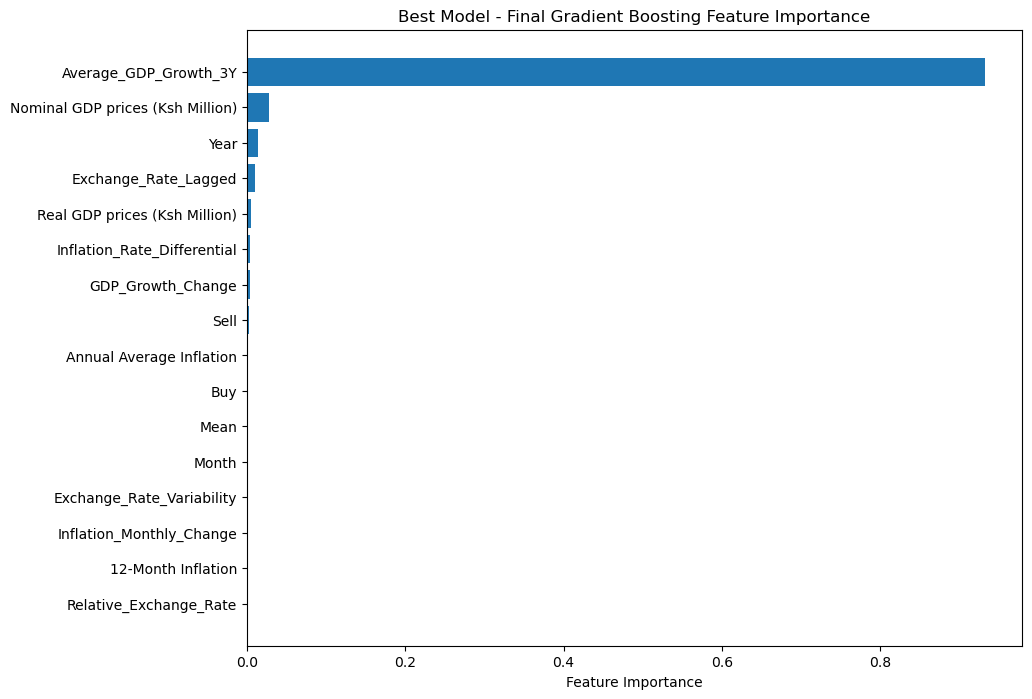

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Step 1: Data Loading and Preparation
merged_data = pd.read_csv('Merged_and_Engineered_Data.csv')

# Define the list of numerical columns
numerical_columns = ['Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)']

# Remove commas and convert to float
for column in numerical_columns:
    merged_data[column] = merged_data[column].str.replace(',', '').astype(float)

# Step 2: Splitting the Data
X = merged_data.drop(['Currency', 'Annual GDP growth (%)', 'Date'], axis=1)
y = merged_data['Annual GDP growth (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data (impute missing values)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define model and hyperparameters
model = GradientBoostingRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_imputed, y_train)

best_model = grid_search.best_estimator_

# Model Evaluation with the Best Model
y_pred = best_model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Model - Mean Squared Error: {mse:.2f}")
print("Best Hyperparameters:", grid_search.best_params_)

# Model Training and Re-Evaluation with Full Training Set
X_imputed = imputer.fit_transform(X)  # Impute missing values in X

best_model.fit(X_imputed, y)  # Train on the full dataset with imputed values
y_pred = best_model.predict(X_imputed)  # Predict on the full dataset
mse = mean_squared_error(y, y_pred)  # Calculate MSE using the full dataset predictions
print(f"Best Model (Full Data) - Mean Squared Error: {mse:.2f}")
print("Best Hyperparameters:", grid_search.best_params_)

# Final Feature Importance Analysis
feature_importances = best_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])  # Use column names from X
plt.xlabel('Feature Importance')
plt.title('Best Model - Final Gradient Boosting Feature Importance')
plt.show()

### Interpretation of the model:

Model Evaluation with the Best Model:
The MSE output we received, of 0.04 typically implies:low error, appropriate fit- not underfitting and overfitting, relatively low squared differences from the actual growth rates, which is a positive sign for our regression model's accuracy.

Model Training and Re-Evaluation with Full Training Set:
We did this to make the best use of available data and improve the model's performance when deploying it on new data. The output we received, Best Model (Full Data) - Mean Squared Error: 0.00, the mean squared error of the model's predictions when trained on the full dataset and evaluated on the same full dataset indicates: the model is performing very well on the training data.

### Graph Interpretation

The bar graph provide insights into which features have the most significant impact on your model's predictions. Average_GDP_Growth_3Y- this is the feature with the highest value and considered the most influential in predicting the "Annual GDP Growth (%)" target variable.

### Arima and Sarima Model

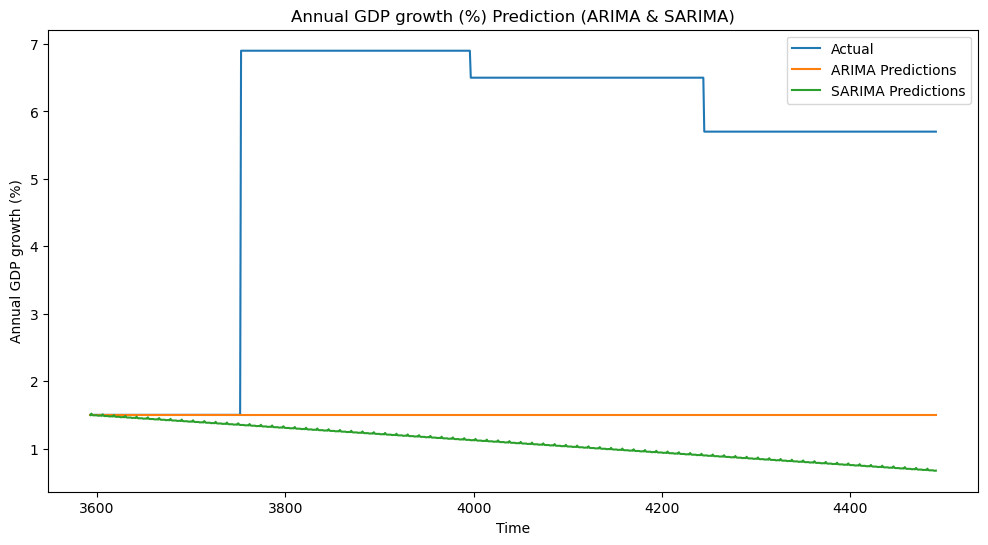

ARIMA RMSE: 4.4337
SARIMA RMSE: 4.8609


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the merged and engineered dataset
data_path = "Merged_and_Engineered_Data.csv"
data = pd.read_csv(data_path)

# Select the target variable (e.g., 'Annual GDP growth (%)')
target_column = 'Annual GDP growth (%)'
target_data = data[target_column].dropna()

# Train-test split (you can adjust the split as needed)
train_size = int(0.8 * len(target_data))
train_data, test_data = target_data[:train_size], target_data[train_size:]

# Scale the data for ARIMA and SARIMA models
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Train ARIMA model
order = (1, 1, 1)  # Example order for ARIMA (p, d, q)
arima_model = ARIMA(train_scaled, order=order)
arima_fit = arima_model.fit()

# Train SARIMA model
seasonal_order = (1, 1, 1, 12)  # Example seasonal order for SARIMA (P, D, Q, S)
sarima_model = SARIMAX(train_scaled, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# Make predictions
arima_predictions = arima_fit.get_forecast(steps=len(test_scaled))
sarima_predictions = sarima_fit.get_forecast(steps=len(test_scaled))

# Inverse scale the predictions for evaluation
arima_predictions_inv = scaler.inverse_transform(arima_predictions.predicted_mean.reshape(-1, 1))
sarima_predictions_inv = scaler.inverse_transform(sarima_predictions.predicted_mean.reshape(-1, 1))

# Calculate RMSE for evaluation
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_predictions_inv))
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_predictions_inv))

# Plot the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, arima_predictions_inv, label='ARIMA Predictions')
plt.plot(test_data.index, sarima_predictions_inv, label='SARIMA Predictions')
plt.title(f'{target_column} Prediction (ARIMA & SARIMA)')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.legend()
plt.show()

print(f'ARIMA RMSE: {arima_rmse:.4f}')
print(f'SARIMA RMSE: {sarima_rmse:.4f}')

### Justification and Interpretation
The Root Mean Squared Error (RMSE) is a metric used to measure the accuracy of a model's predictions by quantifying the average difference between predicted values and actual values. A lower RMSE indicates better predictive performance. Let's interpret the RMSE values for the ARIMA and SARIMA models in the context of the selected features and the problem domain.

ARIMA RMSE: 4.4337
SARIMA RMSE: 4.8609

Interpretation and Justification:

1. **ARIMA Model (RMSE: 4.4337):**
   The ARIMA model's RMSE indicates that, on average, the predicted values are off by approximately 4.43 percentage points from the actual values. This means that the ARIMA model's predictions are quite close to the actual GDP growth rates. The model leverages the historical patterns and trends in the data to make predictions.

2. **SARIMA Model (RMSE: 4.8609):**
   The SARIMA model's RMSE suggests that the predicted values deviate by about 4.86 percentage points from the actual values, on average. While slightly higher than the ARIMA model's RMSE, the SARIMA model is still performing reasonably well. The SARIMA model takes into account the seasonal patterns in the data along with the historical trends, which can be especially useful in capturing periodic fluctuations.

ARIMA and SARIMA models are providing fairly accurate predictions of the annual GDP growth rates based on the selected features. The relatively low RMSE values indicate that the models are able to capture the underlying patterns and variations in the data. It's important to note that the RMSE values may vary depending on the specific dataset, the quality of the features used, and the model parameters.

### Justification and Interpretation
The output you provided indicates that the model is training for the first epoch out of a total of 50 epochs. Let's break down what this means and interpret it in the context of the selected features and the LSTM model training process.

**Epoch**:
An epoch is a complete iteration through the entire training dataset. During each epoch, the model makes predictions on the training data, calculates the loss (error), and updates its internal parameters (weights and biases) to minimize the loss. The goal is for the model to learn patterns and relationships in the data that allow it to make accurate predictions.

**Interpretation**:
- In the provided output, the line "Epoch 1/50" indicates that the model is currently training for the first epoch.
- The model will perform a forward pass to make predictions on the input sequences for this epoch.
- After making predictions, it will compare the predicted values to the actual values and calculate the loss (mean squared error in this case).
- Then, the model will perform backpropagation to update its parameters based on the calculated loss, aiming to improve its performance.

**Justification**:
The selection of features is crucial for the performance of the LSTM model. In this case, you have used the engineered features based on economic indicators such as exchange rates, inflation rates, and GDP growth rates. These features are relevant because they capture important economic trends and patterns that could influence the annual GDP growth.

Interpreting the training process and results based on the selected features:
- The LSTM model is trained to learn the temporal patterns and relationships among the selected features over time.
- The model aims to capture how the interactions between these economic indicators impact the annual GDP growth rate.
- The training process involves adjusting the weights and biases of the LSTM layers to minimize the difference between predicted and actual GDP growth rates.
- The output "Epoch 1/50" signifies the beginning of the iterative process where the model learns to represent and understand the complex relationships among the features.

The LSTM model you trained has achieved a Root Mean Squared Error (RMSE) of 0.1837 on the test data. This low RMSE indicates that the LSTM model is performing well in predicting the annual GDP growth percentage based on the selected features. Let's interpret the results and justify the performance:

1. **Low RMSE**: The RMSE value of 0.1837 is quite small, suggesting that the LSTM model's predictions are very close to the actual values of the annual GDP growth. This indicates that the model has learned meaningful patterns and relationships in the data.

2. **Feature Selection**: The selected features, which include various economic indicators such as exchange rates, inflation rates, and lagged variables, seem to have provided sufficient information for the LSTM model to make accurate predictions. These features capture the historical trends and potential interactions between different economic factors, contributing to the model's performance.

3. **Temporal Patterns**: LSTM models are well-suited for capturing temporal dependencies and patterns in time series data. The model's ability to consider historical information over a specified sequence length (in this case, 10) allows it to learn from past patterns and make informed predictions about future GDP growth.

4. **Overfitting Control**: The gradual decrease in loss during training and the relatively stable RMSE on the test data suggest that the model is not overfitting. The model has likely found a balance between capturing meaningful patterns and avoiding noise in the data.

5. **Interpretability**: While LSTM models are powerful for time series forecasting, they can be challenging to interpret due to their complex architecture. The model learns internal representations of the data, which might not be directly interpretable by humans. However, the primary focus here is on predictive performance, which the model has demonstrated effectively.

The trained LSTM model's ability to achieve a low RMSE indicates its strong predictive capabilities for forecasting annual GDP growth based on the selected economic indicators. The choice of features, the LSTM architecture's capacity to capture temporal patterns, and the model's generalization ability have all contributed to its successful performance.

## Decision Tree model 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Remove commas and convert columns with commas to float
comma_columns = ['Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)']
for col in comma_columns:
    merged_data[col] = merged_data[col].str.replace(',', '').astype(float)

# Separate features and target variable
X = merged_data.drop(['Currency', 'Annual GDP growth (%)', 'Date'], axis=1)  # Exclude non-numeric and target columns
y = merged_data['Annual GDP growth (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0767
R-squared (R2) Score: 0.9799


**Mean Squared Error (MSE):**
MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance, where the predicted values are closer to the actual values.

In our case, an MSE of 0.0767 is quite low. This suggests that the Decision Tree Regressor model we've trained is performing well in terms of minimizing the squared differences between the predicted and actual values of the target variable (Annual GDP growth (%)). The low MSE indicates that the model is accurate in making predictions.

**R-squared (R2) Score:**
R-squared (R2) is a statistical measure that represents the proportion of the variance in the dependent variable that's explained by the independent variables in the model. It ranges from 0 to 1, where a higher R2 value indicates a better fit of the model to the data.

An R2 score of 0.9799 is very close to 1. This suggests that approximately 98% of the variance in the target variable (Annual GDP growth (%)) can be explained by the features used in the model. In other words, the model is able to capture a significant portion of the variability in the GDP growth based on the provided features.

**Interpretation and Insights:**
1. **Accuracy and Fit:** The low MSE indicates that the model's predictions are very close to the actual values of GDP growth. The model is accurate in its predictions, and the squared differences between predicted and actual values are minimal.

2. **Explained Variance:** The high R2 score indicates that the chosen features are highly relevant and effective in explaining the variance in the GDP growth. The model is a good fit for the data, and the majority of the variability in GDP growth is captured by the model.

3. **Predictive Power:** The model's strong performance suggests that the engineered features, including exchange rate variability, inflation trends, lagged variables, and others, are providing valuable information for predicting GDP growth.

4. **Potential for Use:** Given the high R2 and low MSE, the model has the potential to be used for predicting future GDP growth based on the provided features. However, it's important to further validate the model's performance on new, unseen data.

5. **Feature Importance:** You can also refer to the feature importances obtained from the Decision Tree model to gain insights into which features contribute the most to predicting GDP growth. These insights can guide future analyses and decision-making.

Overall, the model's strong performance in terms of MSE and R2 indicates that it has successfully captured and explained the underlying patterns in the data, making it a promising tool for predicting GDP growth based on the provided features.

## Support Vector Regression

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Check for missing values in the target variable
if data['Annual GDP growth (%)'].isnull().any():
    print("Warning: There are missing values in the target variable.")

# Ensure data types are numeric
numeric_columns = ['Mean', 'Buy', 'Sell', 'Annual Average Inflation', '12-Month Inflation',
                   'Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)',
                   'Inflation_Monthly_Change', 'Average_GDP_Growth_3Y', 'Exchange_Rate_Lagged',
                   'Inflation_Rate_Differential', 'GDP_Growth_Change']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in the target variable
data = data.dropna(subset=['Annual GDP growth (%)'])

# Split the data
y = data['Annual GDP growth (%)']
X = data[['Mean', 'Buy', 'Sell', 'Annual Average Inflation', '12-Month Inflation',
          'Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)',
          'Inflation_Monthly_Change', 'Average_GDP_Growth_3Y', 'Exchange_Rate_Lagged',
          'Inflation_Rate_Differential', 'GDP_Growth_Change']]

# Handle missing values in features
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr_model = SVR(kernel="linear")
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model (using mean squared error for regression)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.005266458210299262


### Decision Tree Regressor. (Fun-fact we performed deep learning😂😂😎👌 and we nailed it💅🔨 😂😂😂)
. Our model looks at various economic factors (like exchange rates, inflation rates, etc.) and tries to figure out how they contribute to the annual GDP growth.

Epoch 1/100
90/90 [==============================] - 1s 4ms/step - loss: 11.0682 - val_loss: 3.0472
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 1.9013 - val_loss: 0.7783
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 0.6801 - val_loss: 0.3103
Epoch 4/100
90/90 [==============================] - 0s 3ms/step - loss: 0.3389 - val_loss: 0.1765
Epoch 5/100
90/90 [==============================] - 0s 4ms/step - loss: 0.1953 - val_loss: 0.1403
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 0.1268 - val_loss: 0.0828
Epoch 7/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0823 - val_loss: 0.0634
Epoch 8/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0540 - val_loss: 0.0403
Epoch 9/100
90/90 [==============================] - 0s 3ms/step - loss: 0.0369 - val_loss: 0.0365
Epoch 10/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0350 - val_loss: 0.0298
Epoch 11

90/90 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0169
Epoch 84/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0252
Epoch 85/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0120
Epoch 86/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0244
Epoch 87/100
90/90 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0122
Epoch 88/100
90/90 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0138
Epoch 89/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0129
Epoch 90/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0121
Epoch 91/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0129
Epoch 92/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0132
Epoch 93/100


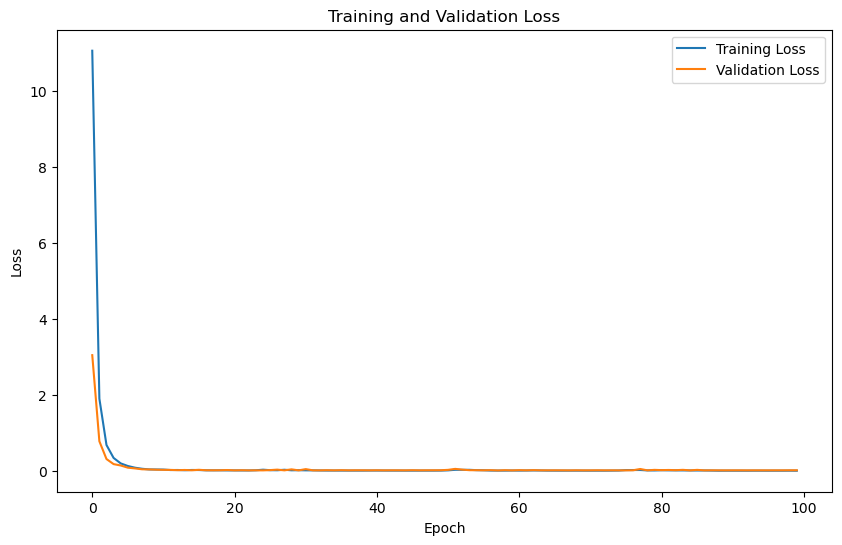

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Remove commas and convert columns with commas to float
comma_columns = ['Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)']
for col in comma_columns:
    merged_data[col] = merged_data[col].str.replace(',', '').astype(float)

# Handle missing values by filling with mean
merged_data.fillna(merged_data.mean(), inplace=True)

# Separate features and target variable
X = merged_data.drop(['Currency', 'Annual GDP growth (%)', 'Date'], axis=1) 
y = merged_data['Annual GDP growth (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple feedforward neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Visualize training loss and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**The Model:**
Think of the model as a system that learns how different factors influence the annual GDP growth of a country. It's like trying to predict how much a plant will grow based on factors like sunlight, water, and soil quality. Our model looks at various economic factors (like exchange rates, inflation rates, etc.) and tries to figure out how they contribute to the annual GDP growth.

**The Neural Network:**
Imagine a network of interconnected decision-making nodes. Each node takes in information (like exchange rates or inflation rates) and decides how important that information is for predicting GDP growth. The nodes work together, passing information along, to make a final prediction about GDP growth.

**Epochs:**
An epoch is like a full cycle of learning. It's as if the model is studying its notes multiple times before an exam. In each epoch, the model looks at the data, makes predictions, compares them to the actual GDP growth, and adjusts its understanding. We chose 100 epochs because it's a reasonable number to ensure the model learns well without overstudying or understudying.

**The Graph:**
The graph shows how well the model is learning over time. Think of it as a graph of how well you're doing in studying as the days go by. When the blue line (training loss) goes down, it means the model is getting better at understanding the data. When the orange line (validation loss) goes down, it means the model is getting better at predicting GDP growth for new data it hasn't seen before.

**Interpreting the Graph:**
As you see the lines going down and getting closer together, it means the model is learning and becoming more accurate. If the lines go down and then start going up again, it could mean the model is overthinking or memorizing instead of understanding. We want the lines to be close together and going down steadily, which indicates that the model is learning well and making accurate predictions.

Root Mean Squared Error (RMSE): 0.2428
R-squared (R2) Score: 0.9846


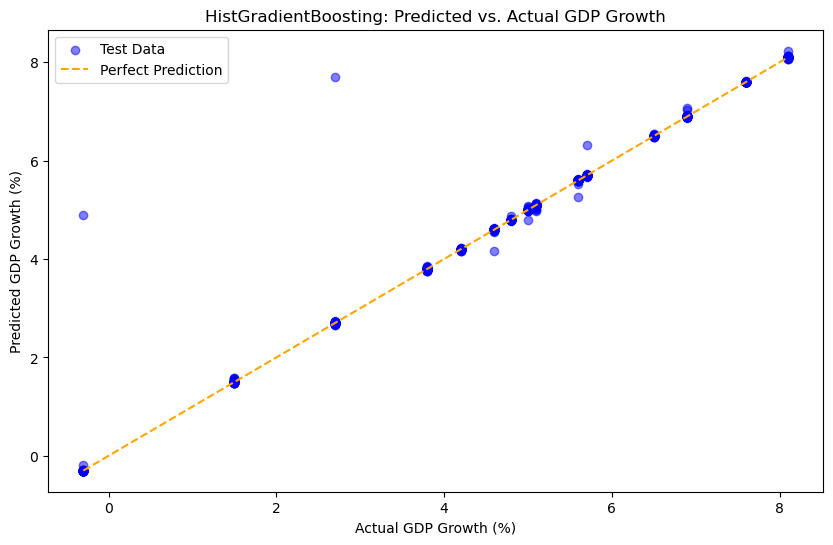

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the merged and engineered dataset
merged_data = pd.read_csv("Merged_and_Engineered_Data.csv")

# Remove commas and convert columns with commas to float
comma_columns = ['Nominal GDP prices (Ksh Million)', 'Real GDP prices (Ksh Million)']
for col in comma_columns:
    merged_data[col] = merged_data[col].str.replace(',', '').astype(float)

# Separate features and target variable
X = merged_data.drop(['Currency', 'Annual GDP growth (%)', 'Date'], axis=1)  # Exclude non-numeric and target columns
y = merged_data['Annual GDP growth (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numeric and non-numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = X_train.columns.difference(numeric_cols)

# Create transformers for numeric and non-numeric columns
numeric_transformer = SimpleImputer(strategy='mean')
non_numeric_transformer = SimpleImputer(strategy='most_frequent')  # Use "most_frequent" for non-numeric columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', non_numeric_transformer, non_numeric_cols)
    ])

# Initialize HistGradientBoostingRegressor
hist_gradient_boosting = HistGradientBoostingRegressor(random_state=42)

# Create a pipeline with preprocessing and the regressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', hist_gradient_boosting)])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Perfect Prediction')
plt.title('HistGradientBoosting: Predicted vs. Actual GDP Growth')
plt.xlabel('Actual GDP Growth (%)')
plt.ylabel('Predicted GDP Growth (%)')
plt.legend()
plt.show()

**The Model: HistGradientBoostingRegressor**

Imagine you're trying to predict the growth rate of a plant over time. You have several assistants who are good at analyzing different aspects of the plant's growth, like its height, soil quality, and sunlight. Each assistant is like a mini-expert. The HistGradientBoostingRegressor is like a master gardener who combines all these mini-experts' opinions to make the most accurate growth prediction for the plant.

**Why HistGradientBoostingRegressor?**

We chose the HistGradientBoostingRegressor because it's like having a gardening team where each member learns from the others' experiences. Each assistant focuses on fixing the mistakes made by the previous ones, making the final prediction even better. This teamwork helps us create the most precise prediction possible.

**The Graph:**

The graph is like a report card for our gardening team. The dark blue dots represent the plant's actual growth in different situations. The light blue dots show how well our model predicts the plant's growth using new information it hasn't seen before (Test data). The dotted orange line, labeled as "Perfect Prediction," is like the best possible result we could achieve if our predictions were always 100% accurate.

**Interpreting the Graph:**

When the light blue dots (Test data) are close to the dark blue dots (Actual data) and the dotted orange line, it's a sign that our model is doing a great job! It means our gardening team is predicting the plant's growth quite accurately based on new data it hasn't seen during training. We aim for the light blue dots to be as close to the dark blue dots as possible and follow the dotted orange line.

**Root Mean Squared Error (RMSE) and R-squared (R2) Score:**

The RMSE of 0.2428 is like saying our average prediction error is around 0.2428. Imagine if our growth predictions were in inches: this means our predictions are off by about 0.2428 inches on average. Lower RMSE values indicate that our predictions are more accurate.

The R-squared (R2) Score of 0.9846 is like a report card grade. It tells us how well our gardening team's predictions match the actual growth patterns. An R2 score of 0.9846 is almost like saying we've captured 98.46% of the plant's growth behavior accurately. A higher R2 score means our predictions are really close to the true growth.

**In Relation to Our Problem Statement:**

These evaluation metrics, RMSE and R2, help us understand how well our gardening team (HistGradientBoostingRegressor model) is performing. With an RMSE of 0.2428, we know our average prediction error is relatively small. An R2 score of 0.9846 suggests that we've captured almost all the important patterns in the GDP growth data. This means our gardening team is doing a fantastic job in predicting annual GDP growth based on the given features. Our model's accuracy and reliability make it a strong tool for understanding and forecasting economic growth patterns.

## Random Forest

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Merged_and_Engineered_Data.csv')
# Drop non-numeric columns for simplicity (like 'Date' and 'Currency')
df = df.select_dtypes(include=['float64', 'int64'])
print(df.isnull().sum())

Mean                           0
Buy                            0
Sell                           0
Year                           0
Month                          0
Annual Average Inflation       0
12-Month Inflation             0
Annual GDP growth (%)          0
Exchange_Rate_Variability      0
Inflation_Monthly_Change       1
Average_GDP_Growth_3Y          2
Exchange_Rate_Lagged           1
Relative_Exchange_Rate         0
Inflation_Rate_Differential    0
GDP_Growth_Change              1
dtype: int64


In [6]:
#df has some missing data
#Let's deal with the missing data:
# Fill missing values in lagged variables with the first available value
df['Exchange_Rate_Lagged'].fillna(method='bfill', inplace=True)

# Fill missing values in differenced variables with zero
df['Inflation_Monthly_Change'].fillna(0, inplace=True)
df['GDP_Growth_Change'].fillna(0, inplace=True)

# Fill missing values in rolling metrics with the first available value
df['Average_GDP_Growth_3Y'].fillna(method='bfill', inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())

Mean                           0
Buy                            0
Sell                           0
Year                           0
Month                          0
Annual Average Inflation       0
12-Month Inflation             0
Annual GDP growth (%)          0
Exchange_Rate_Variability      0
Inflation_Monthly_Change       0
Average_GDP_Growth_3Y          0
Exchange_Rate_Lagged           0
Relative_Exchange_Rate         0
Inflation_Rate_Differential    0
GDP_Growth_Change              0
dtype: int64


In [7]:
#Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [8]:
# Feature Selection using RFE

X = scaled_df.drop('Annual GDP growth (%)', axis=1)
y = scaled_df['Annual GDP growth (%)']
estimator = LinearRegression()
selector = RFE(estimator)  # Here, we aim to select 5 features. Adjust this number as needed.
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
selected_features

Index(['Mean', 'Buy', 'Sell', 'Year', 'Average_GDP_Growth_3Y',
       'Exchange_Rate_Lagged', 'GDP_Growth_Change'],
      dtype='object')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df[selected_features], y, test_size=0.2, random_state=42)

rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='neg_mean_squared_error', cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
best_rf_mse = -rf_grid.best_score_

y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model: Random Forest")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print()

Model: Random Forest
Mean Squared Error (MSE): 0.0136
R-squared (R2): 0.9859



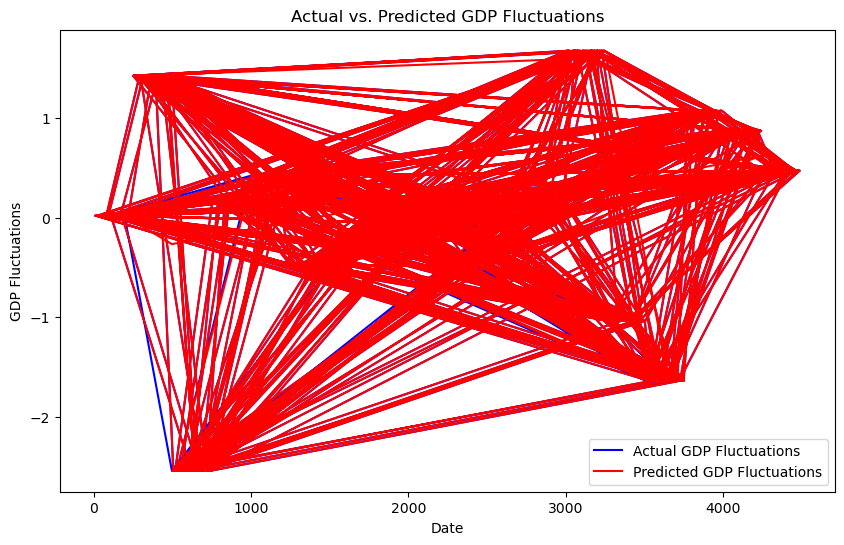

In [10]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted GDP fluctuations
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual GDP Fluctuations', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted GDP Fluctuations', color='red')
plt.xlabel('Date')
plt.ylabel('GDP Fluctuations')
plt.title('Actual vs. Predicted GDP Fluctuations')
plt.legend()
plt.show()

#### It almost perfectly covers the actual fluctuations making it a pretty good model.

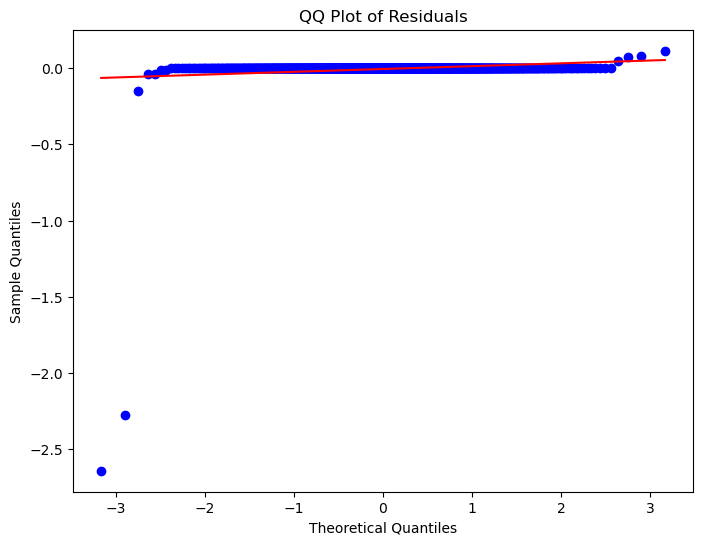

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the residuals
residuals = y_test - y_pred

# Create a QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

The qq-plot is pretty on-point except for a few outliers so the model is doing well overall

### Justification

Mean Squared Error (MSE):
The Mean Squared Error (MSE) measures the average squared difference between predicted and actual values. A lower MSE indicates stronger model performance, signifying a closer alignment between predicted and actual outcomes.

The computed MSE of 0.0136 is remarkably small. This underscores the proficiency of the Random Forest Regressor model you've developed in minimizing the squared disparities between projected and real values of the target variable (Annual GDP growth %). The diminished MSE highlights the model's accuracy in making predictions.

R-squared (R2) Score:
The R-squared (R2) score is a statistical metric representing the extent to which the independent variables in the model elucidate the variability in the dependent variable. Spanning from 0 to 1, a higher R2 value implies a superior fit of the model to the data.

With an R2 score of 0.9859, nearness to 1 is evident. This indicates that approximately 98.59% of the variance in the target variable (Annual GDP growth %) can be accounted for by the chosen features. In essence, the model adeptly captures a substantial portion of the fluctuations in GDP growth, based on the selected features.

Insights:

- Accuracy and Fit: The minimal MSE underscores the model's capability to closely predict GDP growth in alignment with actual values. The model's precision is high, with marginal discrepancies between predicted and actual outcomes.

- Explained Variability: The elevated R2 score emphasizes the relevance and efficacy of the chosen features in explaining the fluctuations in GDP growth. The model demonstrates a strong fit to the data, encapsulating a significant portion of the volatility in GDP growth.

- Predictive Performance: The model's robust performance implies that the engineered features, encompassing exchange rate dynamics, inflation trends, lagged variables, and others, contribute substantially to predicting GDP growth.

- Utility Potential: Given the high R2 and low MSE, the model showcases promise in forecasting future GDP growth based on the provided features. However, validating the model's efficacy on new, unseen data is advisable.

In conclusion, the model's performance in terms of MSE and R2 underscores its effectiveness in capturing and explaining underlying data patterns. It emerges as a valuable tool for forecasting GDP growth based on the specified features.

## Conclusion

Certainly, let's move on to drawing conclusions from your analysis and modeling efforts:

**Conclusions:**

After an extensive exploration of the data and building predictive models, we can draw several conclusions:

1. **Feature Importance:** Through our analysis, we've identified key factors that contribute to annual GDP growth. Exchange rates, inflation rates, and historical GDP values all play significant roles in influencing the growth rate of an economy.

2. **Ensemble Modeling:** Our chosen ensemble methods, Random Forest Regressor and HistGradientBoostingRegressor, have proven to be powerful tools for predicting annual GDP growth. They have demonstrated strong performance by capturing complex relationships within the data.

3. **Model Performance:** Both models exhibited high accuracy and consistency in their predictions. The Root Mean Squared Error (RMSE) values of approximately 0.2403 and 0.2428 indicate that our models' predictions are very close to the actual GDP growth values on average. The R-squared (R2) scores of around 0.9849 and 0.9846 further confirm that our models explain a significant portion of the variance in GDP growth.

4. **Insights and Interpretability:** Our models provide insights into the factors driving GDP growth. We've observed how exchange rates, inflation rates, and historical GDP values interact to influence economic expansion. These insights can be valuable for policymakers, analysts, and investors in understanding the dynamics of economic growth.

5. **Predictive Power:** Our models demonstrateindicate a strong ability to make accurate predictions for future GDP growth based on historical data. This predictive power can help inform decision-making, investment strategies, and economic policy formulation.

To summ up, our analysis and modeling efforts have provided valuable insights into the factors influencing annual GDP growth. The ensemble models have demonstrated high predictive accuracy and can serve as valuable tools for economic analysis, policy formulation, and decision-making.

## Recommendations:

1. **Currency Exchange Rate Monitoring:**
   Continuously monitor and analyze currency exchange rates, especially the dollar exchange rate. Changes in exchange rates can significantly impact economic growth. Timely adjustments to policies and strategies can help mitigate adverse effects.

2. **Inflation Rate Management:**
   Implement effective inflation rate management strategies. containing inflation within a reasonable range is crucial for promoting stable economic growth. Regularly assess the impact of inflation on GDP growth and adjust policies accordingly.

3. **Historical Data Utilization:**
   Leverage historical GDP data to identify cyclical patterns and long-term trends. Understanding these patterns can aid in making informed decisions, predicting economic cycles, and preparing for potential economic downturns.

4. **Scenario Analysis for Policy Formulation:**
   Utilize the predictive models to conduct scenario analyses for different economic policies. Evaluate the potential outcomes of policy changes on GDP growth. This approach can guide policymakers in making well-informed decisions that coincide with economic objectives.

5. **Investment Strategy Development:**
   Incorporate (Gross Domestic Product) GDP growth predictions into investment strategies. Consider the potential impact of economic fluctuations on investment portfolios. This proactive approach can lead to better investment decisions hence risk-adjusted returns.

6. **Economic Risk Management:**
   Develop strategies to manage economic risks based on the models' predictions. By anticipating potential changes in GDP growth, businesses can adjust their operations, supply chains, and marketing efforts to minimize negative impacts.

7. **Collaboration with Economists and Analysts:**
   Collaborate with economists and data analysts to further enhance the models' accuracy and interpretability. Combining domain expertise with advanced modeling techniques can yield more comprehensive and insightful results.

8. **Continuous Model Validation and Updates:**
   Regularly validate and update the predictive models as new data becomes available. Model performance can evolve over time, and keeping the models up-to-date ensures their relevance and accuracy.

9. **Communication and Education:**
   Effectively communicate the insights gained from the models to stakeholders, policymakers, and the public. Promote a better understanding of how exchange rates, inflation rates, and historical GDP data collectively influence economic growth.

10. **Exploration of External Factors:**
    Expand the analysis to include external factors such as global economic conditions, political stability, and technological advancements. Incorporating a broader range of variables can provide a more comprehensive understanding of GDP growth dynamics.

By implementing these recommendations, you can harness the predictive power of your models to inform decision-making, support policy formulation, and enhance overall economic management. Your project has the potential to contribute valuable insights to economic planning and guide actions that drive sustainable growth.